In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import os
from tqdm import tqdm as tqdm

In [2]:
polarization_file = os.listdir('/home3/r05322021/Desktop/FB Data/Polarization/')

In [19]:
polarization_df = pd.DataFrame(columns=[item[-14:-4] for item in polarization_file if 'state' in item])
count_df = pd.DataFrame(columns=[item[-14:-4] for item in polarization_file if 'state' in item])
trump_share_df = pd.DataFrame(columns=[item[-14:-4] for item in polarization_file if 'state' in item])

In [21]:
for _, f in enumerate(tqdm(polarization_file, total=len(polarization_file)), 1):
    if 'state' not in f:
        continue
        
    filename = f'/home3/r05322021/Desktop/FB Data/Polarization/{f}'
    data = pd.read_csv(filename, index_col='state')
    data = data.sort_index()
        
    polarization_df.loc[:, f[-14:-4]] = data['polarization_mean']
    count_df.loc[:, f[-14:-4]] = data['total']
    trump_share_df.loc[:, f[-14:-4]] = data['trump_share']
    

100%|██████████| 80/80 [00:00<00:00, 123.38it/s]


In [39]:
def plot_time_series(df, state, series_type, plot_title):
    df = df.transpose()
    df = df.sort_index()
    ax = sns.lineplot(x=[i+1 for i in range(len(df))], y=df.loc[:, state])
    ax.set(xlabel='Time', ylabel=series_type)
    ax.set_title(plot_title)
    for item in ax.get_xticklabels():
        item.set_rotation(45)
    plt.show()

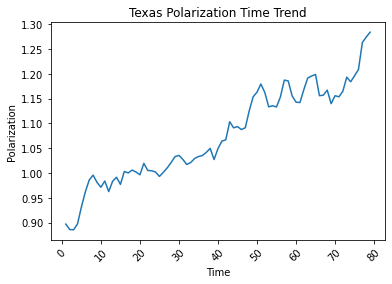

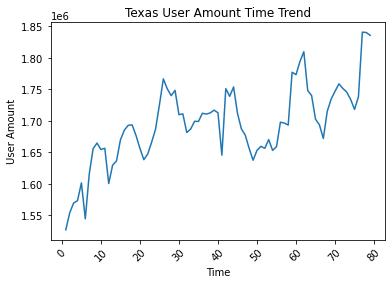

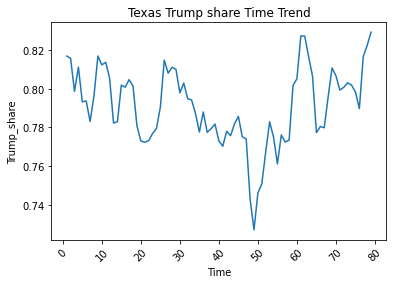

In [43]:
plot_time_series(polarization_df, 'Texas', 'Polarization', 'Texas Polarization Time Trend')
plot_time_series(count_df, 'Texas', 'User Amount', 'Texas User Amount Time Trend')
plot_time_series(trump_share_df, 'Texas', 'Trump_share', 'Texas Trump share Time Trend')